# Read Data set

In [2]:
import pandas as pd
data=pd.read_csv('mammographic_masses.data',na_values=['?'],names=['BI-RADS assessment',
                                                                  'Age',
                                                                  'Shape',
                                                                  'Margin',
                                                                  'Density',
                                                                  'Severity'])

data.head()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [2]:
len(data)

961

In [3]:
data.dtypes

BI-RADS assessment    float64
Age                   float64
Shape                 float64
Margin                float64
Density               float64
Severity                int64
dtype: object

In [3]:
data.isna().sum()

BI-RADS assessment     2
Age                    5
Shape                 31
Margin                48
Density               76
Severity               0
dtype: int64

In [4]:
mask=data.isnull().any(axis=1)
num_of_rows_with_nan=mask.sum()
num_of_total_rows=len(data)
print(num_of_rows_with_nan/num_of_total_rows)

0.13631633714880334


In [5]:
clean_data=data.fillna(0.0)
clean_data

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,0.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,0.0,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


# Separate input from output

In [6]:
input_data=clean_data.drop(columns=['Severity'])
output_data=clean_data['Severity']

# Input data

In [7]:
input_data

,BI-RADS assessment,Age,Shape,Margin,Density
0,5.0,67.0,3.0,5.0,3.0
1,4.0,43.0,1.0,1.0,0.0
2,5.0,58.0,4.0,5.0,3.0
3,4.0,28.0,1.0,1.0,3.0
4,5.0,74.0,1.0,5.0,0.0
...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0
957,4.0,56.0,4.0,5.0,3.0
958,4.0,64.0,4.0,5.0,3.0
959,5.0,66.0,4.0,5.0,3.0


# Output data

In [8]:
output_data

0      1
1      1
2      1
3      0
4      1
      ..
956    0
957    1
958    0
959    1
960    0
Name: Severity, Length: 961, dtype: int64

# Split data set into (train-validation-test)

In [7]:
from sklearn.model_selection import train_test_split
x,x_test, y,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=1)
x_train,x_val, y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=1)

In [8]:
print(x_train.shape)
print(y_train.shape)
print('---------------------')
print(x_val.shape)
print(y_val.shape)
print('---------------------')
print(x_test.shape)
print(y_test.shape)

(614, 5)
(614,)
---------------------
(154, 5)
(154,)
---------------------
(193, 5)
(193,)


In [10]:
from sklearn.metrics import accuracy_score
def evaluate_model(clf, x_tr, y_tr, x_va, y_va):   
    clf.fit(x_tr,y_tr)
    y_pred_train = clf.predict(x_tr)
    y_pred_val = clf.predict(x_va)
    acc_train = accuracy_score(y_tr, y_pred_train)
    acc_val = accuracy_score(y_va, y_pred_val)
    print(clf.__class__.__name__) # function print the name of object class
    print("Accuracy of training: ", acc_train)
    print("Accuracy of validation: ", acc_val)
    print("-------------")
    return acc_train, acc_val

# Support Vector Machine

In [11]:
from sklearn.svm import SVC

## Linear SVM

In [22]:
linear_svc_clf=SVC(kernel='linear',random_state=1,C=100)

#call 'evaluate_model' function
acc_train_linear_svm, acc_val_linear_svm = evaluate_model(
        linear_svc_clf, x_train, y_train, x_val, y_val)

SVC
Accuracy of training:  0.8175895765472313
Accuracy of validation:  0.8701298701298701
-------------


## Poly SVM

In [13]:
poly_svc=SVC(kernel='poly',degree=3,random_state=1,C=100)

#call 'evaluate_model' function
acc_train_poly_svm, acc_val_poly_svm = evaluate_model(
        poly_svc, x_train, y_train, x_val, y_val)

SVC
Accuracy of training:  0.7980456026058632
Accuracy of validation:  0.8246753246753247
-------------


## RBF SVM

In [14]:
rbf_svc_clf=SVC(kernel='rbf',gamma=0.01,random_state=1,C=100)

#call 'evaluate_model' function 
acc_train_rbf_svm, acc_val_rbf_svm = evaluate_model(
        rbf_svc_clf, x_train, y_train, x_val, y_val)

SVC
Accuracy of training:  0.8550488599348535
Accuracy of validation:  0.8441558441558441
-------------


# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, max_depth=1, random_state=100)

acc_train_rf, acc_val_rf = evaluate_model(rf_clf,x_train,y_train,x_val,y_val)

RandomForestClassifier
Accuracy of training:  0.8306188925081434
Accuracy of validation:  0.8701298701298701
-------------


#  Comparing Results

In [31]:
all_results = {
    'Model': [],
    'Train Accuracy': [],
    'Validation Accuracy': [],
}

all_results['Model'] = [ 'Random Forest', 'Linear SVC' , 'Poly SVC ','RBF SVC']

all_results['Train Accuracy'] = [ acc_train_rf,
                            acc_train_linear_svm,
                            acc_train_poly_svm, 
                            acc_train_rbf_svm]

all_results['Validation Accuracy'] =[ acc_val_rf,
                          acc_val_linear_svm , 
                          acc_val_poly_svm,
                          acc_val_rbf_svm]

In [32]:
all_results

{'Model': ['Random Forest', 'Linear SVC', 'Poly SVC ', 'RBF SVC'],
 'Train Accuracy': [0.8306188925081434,
  0.8175895765472313,
  0.7980456026058632,
  0.8550488599348535],
 'Validation Accuracy': [0.8701298701298701,
  0.8701298701298701,
  0.8246753246753247,
  0.8441558441558441]}

In [33]:
all_results_df =pd.DataFrame(all_results)
all_results_df.sort_values(by='Validation Accuracy', ascending=False, ignore_index=True, inplace=True)
all_results_df

,Model,Train Accuracy,Validation Accuracy
0,Random Forest,0.830619,0.870130
1,Linear SVC,0.817590,0.870130
2,RBF SVC,0.855049,0.844156
3,Poly SVC,0.798046,0.824675


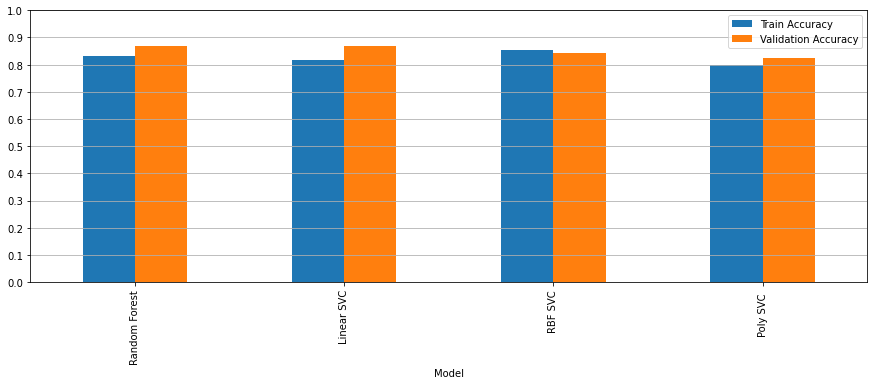

In [34]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

all_results_df.plot.bar(x='Model', y=['Train Accuracy', 'Validation Accuracy'], figsize=(15,5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

# The Best Model

In [37]:
best_model= RandomForestClassifier(n_estimators=500, max_depth=1, random_state=100)
best_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=1, n_estimators=500, random_state=100)

# Test

In [38]:
y_pred_test = best_model.predict(x_test)
print(accuracy_score(y_test, y_pred_test))

0.8393782383419689


# Save Model

In [40]:
import pickle

with open('saved-model.pickle', 'wb') as f:
    pickle.dump(rf_clf, f)